In [1]:
# hudl_JLeague_data_exploration.ipynb

import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 경로 설정
data_path = Path("hudl_JLeague")

In [20]:
# 1. Check file list and basic information
print("=== Data File List ===")
for file in data_path.glob("*"):
    size_mb = file.stat().st_size / (1024 * 1024)
    print(f"{file.name}: {size_mb:.1f} MB")

print("\n" + "="*50)


=== Data File List ===
hudl_physical.json: 250.4 MB
players_mapping.csv: 0.0 MB
sb_events.json: 1436.9 MB
teams_mapping.csv: 0.0 MB
matches_mapping.csv: 0.0 MB
sb_matches.json: 0.6 MB



In [21]:
# Sample analysis of hudl_physical.json
print("\n--- hudl_physical.json (Sample) ---")
with open(data_path / "hudl_physical.json", 'r', encoding='utf-8') as f:
    # Read the first few lines to understand the structure
    first_lines = []
    for i, line in enumerate(f):
        if i < 5:  # Read only the first 5 lines
            first_lines.append(line.strip())
        else:
            break

print(f"First 5 lines structure:")
for i, line in enumerate(first_lines):
    try:
        data = json.loads(line)
        print(f"Line {i+1} - Type: {type(data)}")
        if isinstance(data, dict):
            print(f"  Keys: {list(data.keys())}")
        elif isinstance(data, list): 
            print(f"  List length: {len(data)}")
            if len(data) > 0:
                print(f"  First item keys: {list(data[0].keys())}")
    except json.JSONDecodeError:
        print(f"Line {i+1} - JSON decode error")



--- hudl_physical.json (Sample) ---
First 5 lines structure:
Line 1 - Type: <class 'list'>
  List length: 1061500
  First item keys: ['matchId', 'label', 'dateutc', 'teamId', 'teamName', 'playerid', 'player', 'metric', 'phase', 'value']


In [22]:
# Detailed analysis of hudl_physical.json
print("=== Detailed Analysis of hudl_physical.json ===")

# Load the entire dataset (within memory limits)
with open(data_path / "hudl_physical.json", 'r', encoding='utf-8') as f:
    hudl_data = json.load(f)

print(f"Total number of records: {len(hudl_data):,}")

# Detailed analysis of the first sample
print("\n--- Detailed Analysis of the First Sample ---")
first_sample = hudl_data[0]
print("First record:")
for key, value in first_sample.items():
    print(f"  {key}: {value} (Type: {type(value)})")

# Analyze overall data structure
print("\n--- Data Structure Overview ---")
all_keys = set()
key_types = {}
key_values = {}

for i, sample in enumerate(hudl_data[:1000]):  # Analyze the first 1000 samples
    for key, value in sample.items():
        all_keys.add(key)

        if key not in key_types:
            key_types[key] = []
        key_types[key].append(type(value))

        if key not in key_values:
            key_values[key] = []
        key_values[key].append(value)

print(f"All detected keys: {sorted(all_keys)}")

# Detailed analysis by key
print("\n--- Detailed Analysis by Key ---")
for key in sorted(all_keys):
    types = key_types[key]
    values = key_values[key]

    print(f"\n{key}:")
    print(f"  Data types: {pd.Series(types).value_counts().to_dict()}")

    # Number of unique values
    unique_values = set(values)
    print(f"  Number of unique values: {len(unique_values)}")

    # Value distribution (top 10)
    value_counts = pd.Series(values).value_counts()
    print(f"  Top 10 values:")
    for val, count in value_counts.head(10).items():
        print(f"    {val}: {count} times")

    # Statistics for numeric values
    numeric_values = [v for v in values if isinstance(v, (int, float)) and v is not None]
    if numeric_values:
        print(f"  Numeric stats: mean={np.mean(numeric_values):.2f}, median={np.median(numeric_values):.2f}, "
              f"min={min(numeric_values)}, max={max(numeric_values)}")


=== Detailed Analysis of hudl_physical.json ===
Total number of records: 1,061,500

--- Detailed Analysis of the First Sample ---
First record:
  matchId: 5551794 (Type: <class 'str'>)
  label: Yokohama F. Marinos - Sagan Tosu, 0-1 (Type: <class 'str'>)
  dateutc: 2024-07-03 10:00:00 (Type: <class 'str'>)
  teamId: 12798 (Type: <class 'str'>)
  teamName: Yokohama F. Marinos (Type: <class 'str'>)
  playerid: 299270 (Type: <class 'str'>)
  player: J. Amano (Type: <class 'str'>)
  metric: Count Medium Acceleration (Type: <class 'str'>)
  phase: Session (Type: <class 'str'>)
  value: 146 (Type: <class 'int'>)

--- Data Structure Overview ---
All detected keys: ['dateutc', 'label', 'matchId', 'metric', 'phase', 'player', 'playerid', 'teamId', 'teamName', 'value']

--- Detailed Analysis by Key ---

dateutc:
  Data types: {<class 'str'>: 1000}
  Number of unique values: 1
  Top 10 values:
    2024-07-03 10:00:00: 1000 times

label:
  Data types: {<class 'str'>: 1000}
  Number of unique values

In [23]:
# Data distribution by match, team, player
print("\n=== Data Distribution Analysis ===")

# Number of records per match
match_counts = pd.Series([item['matchId'] for item in hudl_data]).value_counts()
print(f"Number of records per match:")
print(f"  Total number of matches: {len(match_counts)}")
print(f"  Average records per match: {len(hudl_data) / len(match_counts):.1f}")
print(f"  Minimum records per match: {match_counts.min()}")
print(f"  Maximum records per match: {match_counts.max()}")

# Number of records per team
team_counts = pd.Series([item['teamName'] for item in hudl_data]).value_counts()
print(f"\nNumber of records per team (Top 10):")
print(team_counts.head(10))

# Number of records per player
player_counts = pd.Series([item['player'] for item in hudl_data]).value_counts()
print(f"\nNumber of records per player (Top 10):")
print(player_counts.head(10))

# Number of records per metric
metric_counts = pd.Series([item['metric'] for item in hudl_data]).value_counts()
print(f"\nNumber of records per metric:")
print(metric_counts)

# Number of records per phase
phase_counts = pd.Series([item['phase'] for item in hudl_data]).value_counts()
print(f"\nNumber of records per phase:")
print(phase_counts)



=== Data Distribution Analysis ===


Number of records per match:
  Total number of matches: 378
  Average records per match: 2808.2
  Minimum records per match: 2168
  Maximum records per match: 3087

Number of records per team (Top 10):
Sagan Tosu             55698
Gamba Osaka            54636
Yokohama F. Marinos    54564
Tokyo                  54377
Cerezo Osaka           53766
Consadole Sapporo      53685
Albirex Niigata        53554
Júbilo Iwata           53507
Tokyo Verdy            53356
Shonan Bellmare        53029
Name: count, dtype: int64

Number of records per player (Top 10):
Y. Suzuki       11708
S. Tanaka        8583
K. Matsubara     7703
S. Fukuda        7134
R. Watanabe      6318
S. Fukuoka       6249
S. Nakano        5308
T. Suzuki        5270
J. Suzuki        4687
K. Kurokawa      4662
Name: count, dtype: int64

Number of records per metric:
M/min                                77781
Total Distance                       77773
Max Speed                            77773
Count Medium Acceleration           

In [24]:
# Detailed analysis of a specific match
print("\n=== Detailed Analysis of a Specific Match ===")

# Filter by the first match ID
first_match_id = hudl_data[0]['matchId']
match_data = [item for item in hudl_data if item['matchId'] == first_match_id]

print(f"Match ID: {first_match_id}")
print(f"Number of records for this match: {len(match_data)}")

# Teams involved in the match
teams_in_match = set(item['teamName'] for item in match_data)
print(f"Teams involved: {teams_in_match}")

# Metrics measured in the match
metrics_in_match = set(item['metric'] for item in match_data)
print(f"Metrics recorded: {sorted(metrics_in_match)}")

# Sample data for each metric
print(f"\nSample data by metric:")
for metric in sorted(metrics_in_match):
    metric_samples = [item for item in match_data if item['metric'] == metric]
    print(f"\n{metric}:")
    for i, sample in enumerate(metric_samples[:3]):  # First 3 samples only
        print(f"  Sample {i+1}: {sample}")



=== Detailed Analysis of a Specific Match ===
Match ID: 5551794
Number of records for this match: 2975
Teams involved: {'Sagan Tosu', 'Yokohama F. Marinos'}
Metrics recorded: ['Count HI', 'Count HSR', 'Count High Acceleration', 'Count High Deceleration', 'Count Medium Acceleration', 'Count Medium Deceleration', 'Count Sprint', 'High Intensity (HI) Distance', 'High Speed Running (HSR) Distance', 'M/min', 'Max Speed', 'Running Distance', 'Sprinting Distance', 'Total Distance']

Sample data by metric:

Count HI:
  Sample 1: {'matchId': '5551794', 'label': 'Yokohama F. Marinos - Sagan Tosu, 0-1', 'dateutc': '2024-07-03 10:00:00', 'teamId': '12798', 'teamName': 'Yokohama F. Marinos', 'playerid': '299270', 'player': 'J. Amano', 'metric': 'Count HI', 'phase': 'Session', 'value': 53}
  Sample 2: {'matchId': '5551794', 'label': 'Yokohama F. Marinos - Sagan Tosu, 0-1', 'dateutc': '2024-07-03 10:00:00', 'teamId': '12798', 'teamName': 'Yokohama F. Marinos', 'playerid': '299270', 'player': 'J. Ama


=== Time-based Data Analysis ===
Data count by date (Top 10):
2024-02-23 05:00:00    2848
2024-02-23 09:00:00    2856
2024-02-24 04:00:00    2915
2024-02-24 05:00:00    5814
2024-02-24 06:00:00    8563
2024-02-25 05:00:00    5614
2024-03-01 10:00:00    5485
2024-03-02 04:00:00    2765
2024-03-02 05:00:00    8569
2024-03-02 06:00:00    8446
Name: count, dtype: int64

Date range:


  Start: 2024-02-23 05:00:00
  End: 2024-12-08 05:00:00


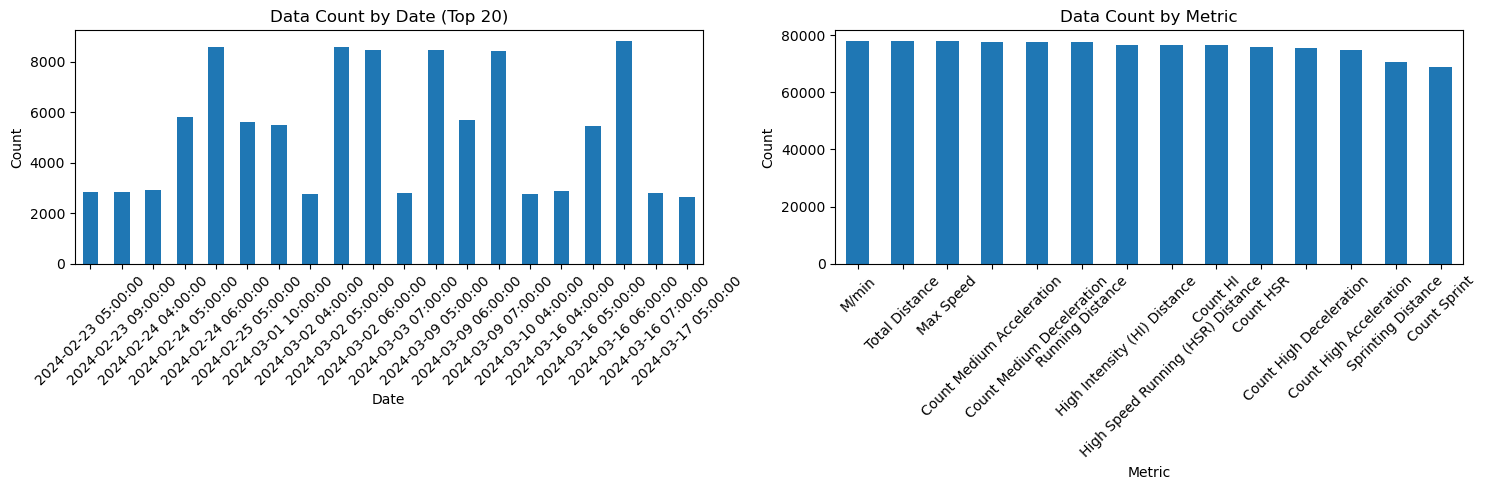

In [11]:
# Time-based data analysis
print("\n=== Time-based Data Analysis ===")

# Data count by date
dates = [item['dateutc'] for item in hudl_data]
date_counts = pd.Series(dates).value_counts().sort_index()

print(f"Data count by date (Top 10):")
print(date_counts.head(10))

# Date range
print(f"\nDate range:")
print(f"  Start: {min(dates)}")
print(f"  End: {max(dates)}")

# Visualization
plt.figure(figsize=(15, 5))

# Data count by date
plt.subplot(1, 2, 1)
date_counts.head(20).plot(kind='bar')
plt.title('Data Count by Date (Top 20)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Data count by metric
plt.subplot(1, 2, 2)
metric_counts.plot(kind='bar')
plt.title('Data Count by Metric')
plt.xlabel('Metric')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


=== Physical Metric Value Analysis ===
Numeric metrics: ['Count Medium Acceleration', 'Count High Acceleration', 'Count Medium Deceleration', 'Count High Deceleration', 'Total Distance', 'M/min', 'Running Distance', 'High Speed Running (HSR) Distance', 'Sprinting Distance', 'High Intensity (HI) Distance', 'Count HSR', 'Count Sprint', 'Count HI', 'Max Speed']

Count Medium Acceleration:
  Count: 77581
  Mean: 55.77
  Median: 36.00
  Std: 47.03
  Min: 0.0
  Max: 305.0


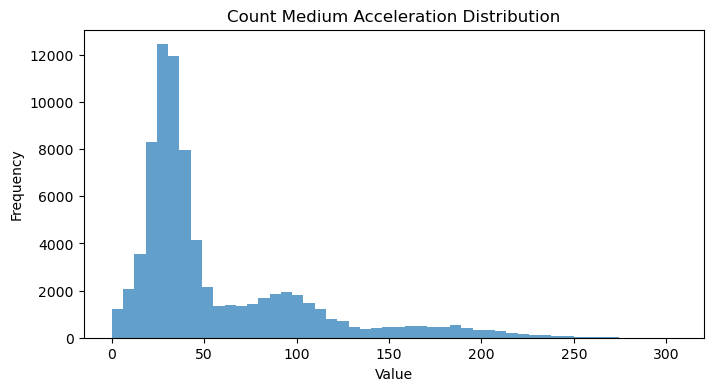


Count High Acceleration:
  Count: 74881
  Mean: 7.57
  Median: 5.00
  Std: 6.75
  Min: 0.0
  Max: 55.0


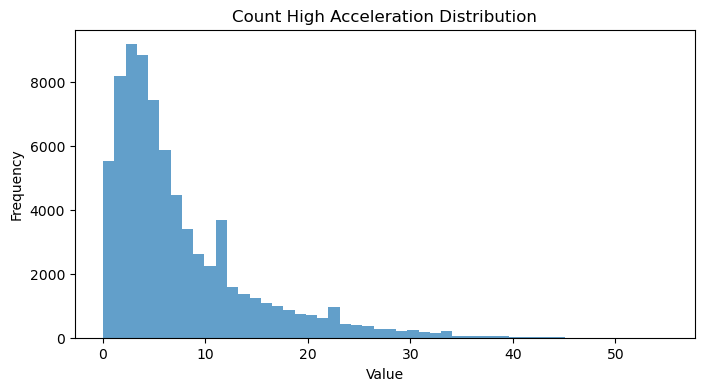


Count Medium Deceleration:
  Count: 77567
  Mean: 48.17
  Median: 31.00
  Std: 40.61
  Min: 0.0
  Max: 286.0


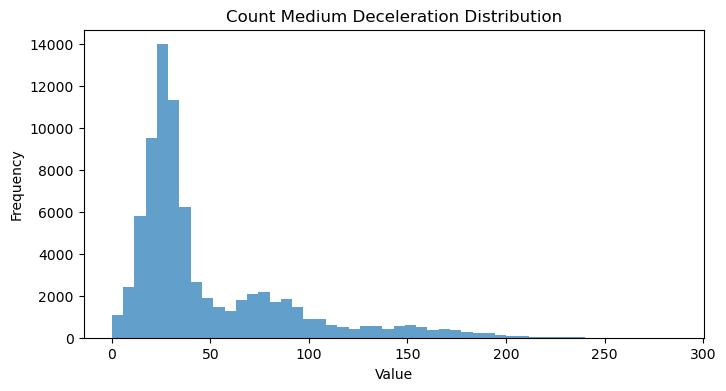


Count High Deceleration:
  Count: 75567
  Mean: 8.87
  Median: 6.00
  Std: 7.92
  Min: 0.0
  Max: 64.0


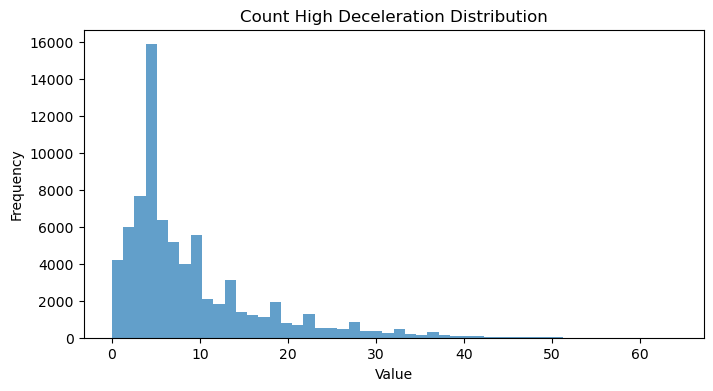


Total Distance:
  Count: 77773
  Mean: 2968.69
  Median: 1850.04
  Std: 2444.24
  Min: 0.0
  Max: 13155.4052


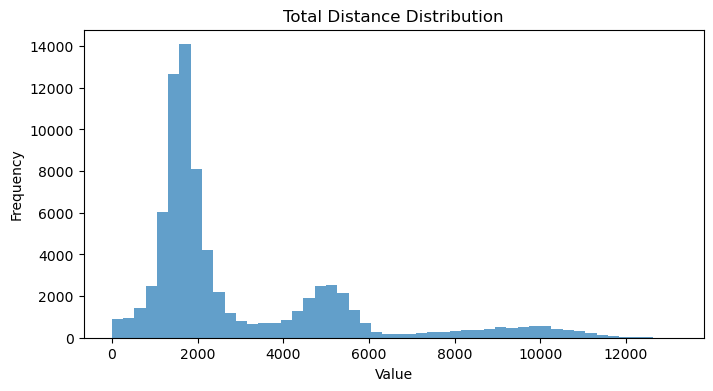


Running Distance:
  Count: 77488
  Mean: 384.85
  Median: 257.27
  Std: 342.67
  Min: 0.0
  Max: 2835.3118


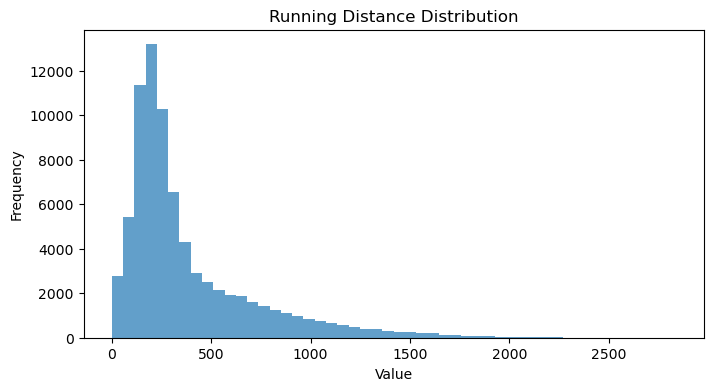


High Speed Running (HSR) Distance:
  Count: 76648
  Mean: 161.24
  Median: 110.42
  Std: 144.18
  Min: 0.0
  Max: 1488.4753


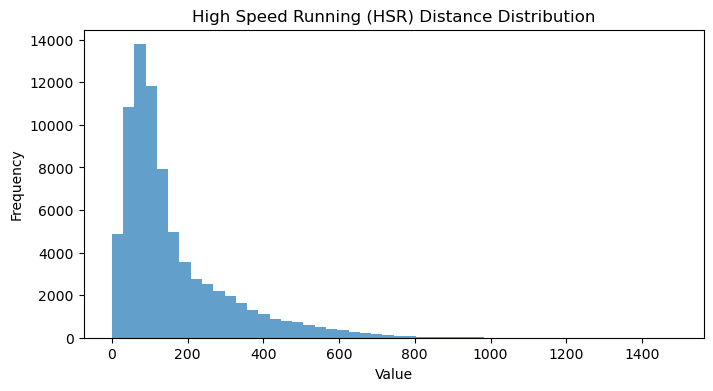


Sprinting Distance:
  Count: 70538
  Mean: 61.97
  Median: 42.31
  Std: 62.22
  Min: 0.0
  Max: 616.4645


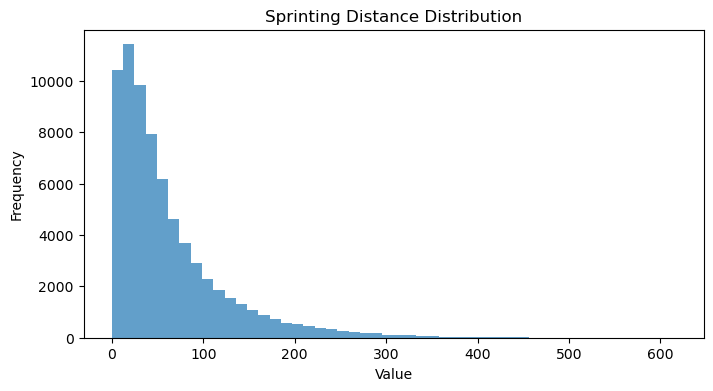


High Intensity (HI) Distance:
  Count: 76648
  Mean: 218.27
  Median: 150.32
  Std: 197.03
  Min: 0.0
  Max: 1808.6129


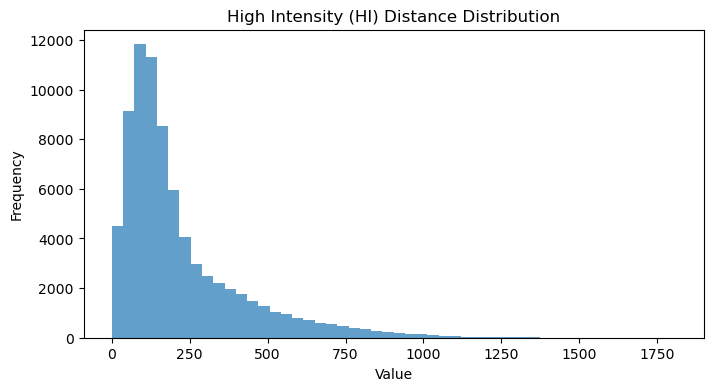


Count HSR:
  Count: 75887
  Mean: 11.44
  Median: 8.00
  Std: 10.10
  Min: -1.0
  Max: 87.0


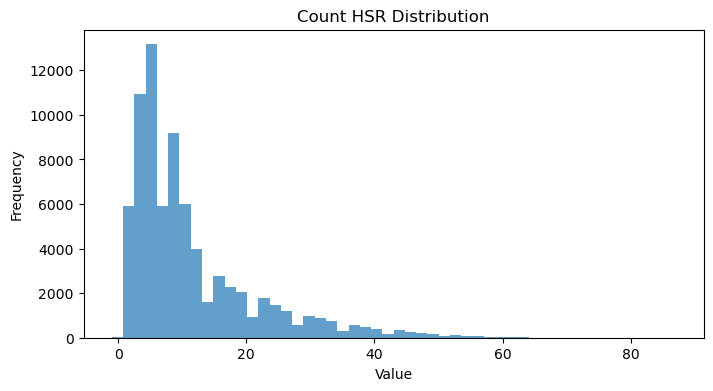


Count Sprint:
  Count: 68978
  Mean: 4.81
  Median: 3.00
  Std: 4.33
  Min: 0.0
  Max: 39.0


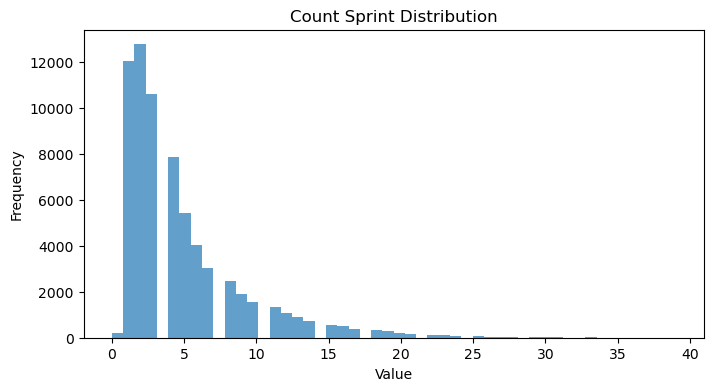


Count HI:
  Count: 76390
  Mean: 15.71
  Median: 11.00
  Std: 13.65
  Min: 0.0
  Max: 112.0


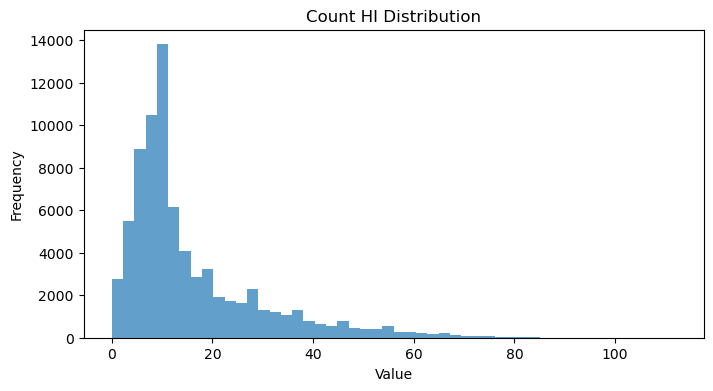


Max Speed:
  Count: 77773
  Mean: 28.84
  Median: 29.21
  Std: 3.19
  Min: 0.0
  Max: 36.2445


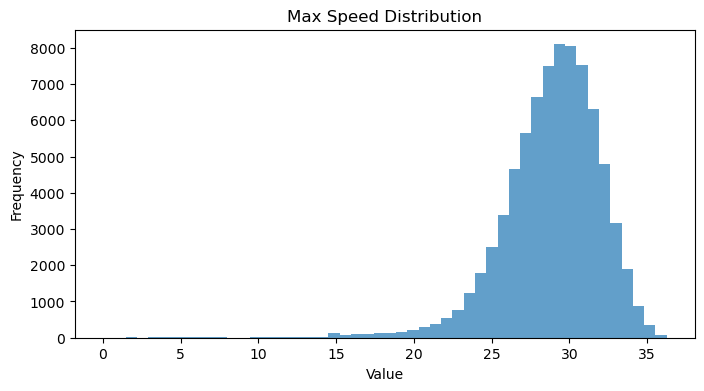

In [16]:
# Physical Metric Value Analysis
print("\n=== Physical Metric Value Analysis ===")

# Find numeric metrics
numeric_metrics = []
for item in hudl_data[:1000]:  # Analyze sample
    try:
        value = float(item['value'])
        if item['metric'] not in numeric_metrics:
            numeric_metrics.append(item['metric'])
    except (ValueError, TypeError):
        continue

print(f"Numeric metrics: {numeric_metrics}")

# Statistics for each numeric metric
for metric in numeric_metrics:
    metric_values = []
    for item in hudl_data:
        if item['metric'] == metric:
            try:
                if item['metric'] == 'M/min': continue
                value = float(item['value'])
                metric_values.append(value)
            except (ValueError, TypeError):
                continue
    
    if metric_values:
        print(f"\n{metric}:")
        print(f"  Count: {len(metric_values)}")
        print(f"  Mean: {np.mean(metric_values):.2f}")
        print(f"  Median: {np.median(metric_values):.2f}")
        print(f"  Std: {np.std(metric_values):.2f}")
        print(f"  Min: {min(metric_values)}")
        print(f"  Max: {max(metric_values)}")
        
        # Histogram
        plt.figure(figsize=(8, 4))
        plt.hist(metric_values, bins=50, alpha=0.7)
        plt.title(f'{metric} Distribution')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

In [25]:
# Summary Report
print("\n=== Hudl Physical Data Summary Report ===")

print(f"""
📊 Summary of Hudl Physical Data Analysis

📌 Data Overview:
- Total records: {len(hudl_data):,}
- Number of matches: {len(match_counts)}
- Number of teams: {len(team_counts)}
- Number of players: {len(player_counts)}
- Number of metric types: {len(metric_counts)}

📈 Data Distribution:
- Avg. records per match: {len(hudl_data) / len(match_counts):.1f}
- Avg. records per team: {len(hudl_data) / len(team_counts):.1f}
- Avg. records per player: {len(hudl_data) / len(player_counts):.1f}

📋 Top Metrics:
{chr(10).join([f"- {metric}: {count:,}" for metric, count in metric_counts.head(10).items()])}

🏃 Distribution by Phase:
{chr(10).join([f"- {phase}: {count:,}" for phase, count in phase_counts.items()])}

📅 Time Range:
- Start: {min(dates)}
- End: {max(dates)}
""")



=== Hudl Physical Data Summary Report ===

📊 Summary of Hudl Physical Data Analysis

📌 Data Overview:
- Total records: 1,061,500
- Number of matches: 378
- Number of teams: 20
- Number of players: 559
- Number of metric types: 14

📈 Data Distribution:
- Avg. records per match: 2808.2
- Avg. records per team: 53075.0
- Avg. records per player: 1898.9

📋 Top Metrics:
- M/min: 77,781
- Total Distance: 77,773
- Max Speed: 77,773
- Count Medium Acceleration: 77,581
- Count Medium Deceleration: 77,567
- Running Distance: 77,488
- High Intensity (HI) Distance: 76,648
- High Speed Running (HSR) Distance: 76,648
- Count HI: 76,390
- Count HSR: 75,887

🏃 Distribution by Phase:
- Session: 150,517
- 2nd Half: 145,373
- 76'-120+': 118,942
- 61'-75': 116,047
- 1st Half: 107,947
- 46'-60': 107,758
- 31'-45+': 105,429
- 1'-15': 105,155
- 16'-30': 104,332

📅 Time Range:
- Start: 2024-02-23 05:00:00
- End: 2024-12-08 05:00:00

